# Titanic: Machine Learning from Disaster

<font color='blue'> keywords:<font color='black'> loading data, exploring data, visualization, feature engineering, modeling and prediction, evaluation metric

<div style='float: right'>
  <img style='width: 300px' src="images/titanic.jpg"></img>
</div>

This notebook will walk you through some of the basic steps in a example data science project. We will use the [Titanic dataset](https://www.kaggle.com/c/titanic) from [Kaggle](https://www.kaggle.com/) - a platform for and community of data scientists and data enthusiasts - to demonstrate the steps.

The dataset is about the infamous [Titanic](https://en.wikipedia.org/wiki/RMS_Titanic) shipwreck. In this session, we will see how to:
<font color='blue'>
   * install and load packages in R
   * load a dataset
   * explore a dataset
   * generate new features
   * build a predictive model
   * save results to file

### Installing and loading packages
R has a rich set of packages for statistical data analysis. Use:
  - `install.packages("<package name>", [options])` to install a package and
  - `library(<package name>)` to load an already installed package into the current R session

where `<package name>` is the name of the package you want to install or load. E.g.,

    install.packages("rattle", repos="http://cran.uni-muenster.de")
    install.packages("RGtk2", repos="http://cran.uni-muenster.de")

**Example:** Install (if necessary) and load the packages tidyverse, rpart, rattle and randomForest

In [1]:
# installing libraries
install.packages("rattle", repos="http://cran.uni-muenster.de")
install.packages("RGtk2", repos="http://cran.uni-muenster.de")

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Warning message in install.packages("RGtk2", repos = "http://cran.uni-muenster.de"):
“installation of package ‘RGtk2’ had non-zero exit status”Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [2]:
# loading libraries
library(tidyverse)
library(rpart)
library(rattle)
library(randomForest)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.1.1       ✔ purrr   0.3.2  
✔ tibble  2.1.1       ✔ dplyr   0.8.0.1
✔ tidyr   0.8.3       ✔ stringr 1.4.0  
✔ readr   1.3.1       ✔ forcats 0.4.0  
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
Rattle: A free graphical interface for data science with R.
Version 5.2.0 Copyright (c) 2006-2018 Togaware Pty Ltd.
Type 'rattle()' to shake, rattle, and roll your data.
randomForest 4.6-14
Type rfNews() to see new features/changes/bug fixes.

Attaching package: ‘randomForest’

The following object is masked from ‘package:rattle’:

    importance

The following ob

### Loading data

In order to work with a dataset, we need to load it. Use 
    
    read_csv("<file_path>") to read a csv file to your R session.
    
**Example:** Load the following datasets in the provided **'data**' folder 
1. train data used to build your machine learning models available under **'data/train.csv'** 
2. test data to see how well your model performs on unseen data available under **'data/test.csv'**

In [3]:
titanicTrain <- read_csv('dataset/train.csv')
titanicTest <- read_csv('dataset/test.csv')

Parsed with column specification:
cols(
  PassengerId = col_double(),
  Survived = col_double(),
  Pclass = col_double(),
  Name = col_character(),
  Sex = col_character(),
  Age = col_double(),
  SibSp = col_double(),
  Parch = col_double(),
  Ticket = col_character(),
  Fare = col_double(),
  Cabin = col_character(),
  Embarked = col_character()
)
Parsed with column specification:
cols(
  PassengerId = col_double(),
  Pclass = col_double(),
  Name = col_character(),
  Sex = col_character(),
  Age = col_double(),
  SibSp = col_double(),
  Parch = col_double(),
  Ticket = col_character(),
  Fare = col_double(),
  Cabin = col_character(),
  Embarked = col_character()
)


### Exploring data
Here are some directions to explore the data:

- Get an overview of the dataset **`<dataset name>`**
- Which observed variables does it contain? **`?names`**
- Display a consise structure of the dataset **`?str`**
- Inspect a variable. **`<dataframe>$<variablename>`**
- Inspect some values of the dataset. **?filter ?select**
- Check for missing values. **`?summary`**
- How many survivers by gender? **`?table`**

In [4]:
# Example: view the dataset
titanicTest

PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NA,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NA,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NA,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NA,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NA,S
897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NA,S
898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NA,Q
899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NA,S
900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NA,C
901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NA,S


In [5]:
# Example: to learn about "dim" function
?dim

In [6]:
# Then use the "dim" function to view number of rows and columns in titanic datasets
dim(titanicTrain)
dim(titanicTest)

[1] 891  12

[1] 418  11

In [7]:
# Example: Display the structure of the dataset.
str(titanicTrain)

Classes ‘spec_tbl_df’, ‘tbl_df’, ‘tbl’ and 'data.frame':	891 obs. of  12 variables:
 $ PassengerId: num  1 2 3 4 5 6 7 8 9 10 ...
 $ Survived   : num  0 1 1 1 0 0 0 0 1 1 ...
 $ Pclass     : num  3 1 3 1 3 3 1 3 3 2 ...
 $ Name       : chr  "Braund, Mr. Owen Harris" "Cumings, Mrs. John Bradley (Florence Briggs Thayer)" "Heikkinen, Miss. Laina" "Futrelle, Mrs. Jacques Heath (Lily May Peel)" ...
 $ Sex        : chr  "male" "female" "female" "female" ...
 $ Age        : num  22 38 26 35 35 NA 54 2 27 14 ...
 $ SibSp      : num  1 1 0 1 0 0 0 3 0 1 ...
 $ Parch      : num  0 0 0 0 0 0 0 1 2 0 ...
 $ Ticket     : chr  "A/5 21171" "PC 17599" "STON/O2. 3101282" "113803" ...
 $ Fare       : num  7.25 71.28 7.92 53.1 8.05 ...
 $ Cabin      : chr  NA "C85" NA "C123" ...
 $ Embarked   : chr  "S" "C" "S" "S" ...
 - attr(*, "spec")=
  .. cols(
  ..   PassengerId = col_double(),
  ..   Survived = col_double(),
  ..   Pclass = col_double(),
  ..   Name = col_character(),
  ..   Sex = col_character(),

In [8]:
# Example: What are the columns in the dataset?
names(titanicTrain)

[1] "PassengerId" "Survived"    "Pclass"      "Name"        "Sex"        
 [6] "Age"         "SibSp"       "Parch"       "Ticket"      "Fare"       
[11] "Cabin"       "Embarked"

In [9]:
#Example: Inspect the first 10 values of the variable Cabin
titanicTrain$Cabin[0:10]

[1] NA     "C85"  NA     "C123" NA     NA     "E46"  NA     NA     NA

In [10]:
# Example: How many people survived in the training dataset
table(titanicTrain$Survived)


  0   1 
549 342 

In [11]:
# Example: Summarize the dataset and check for variables with missing values
summary(titanicTest$Age)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
   0.17   21.00   27.00   30.27   39.00   76.00      86 

In [12]:
# What can we do with the NA values?

In [13]:
# Take a note of the minimum age, 0.17, from the previous cell
# Example: Select passengers younger than 1 year
# Who is this person with 0.17

filter(titanicTest, Age < 1)

PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1093,3,"Danbom, Master. Gilbert Sigvard Emanuel",male,0.33,0,2,347080,14.400,NA,S
1142,2,"West, Miss. Barbara J",female,0.92,1,2,C.A. 34651,27.750,NA,S
1173,3,"Peacock, Master. Alfred Edward",male,0.75,1,1,SOTON/O.Q. 3101315,13.775,NA,S
1199,3,"Aks, Master. Philip Frank",male,0.83,0,1,392091,9.350,NA,S
1246,3,"Dean, Miss. Elizabeth Gladys Millvina""""",female,0.17,1,2,C.A. 2315,20.575,NA,S


In [14]:
# Example: To compute the proportion of survival in our training set
prop.table(table(titanicTrain$Survived))


        0         1 
0.6161616 0.3838384 

### Predictive Modeling
We examine the performance of some simple models for predicting the survivors

In [15]:
# Example: The simplest model - a trivial first prediction with the assumption that everybody died
pred1 <- mutate(titanicTest, Survived = 0) %>% 
        select(PassengerId, Survived)
# To measure the performance of this prediction, we save it to file and submit to 
# the Kaggle challenge for evaluation
write.csv(pred1, file = "pred1.csv", row.names=FALSE)

Another simple model that base on relationship between Sex and Survival.

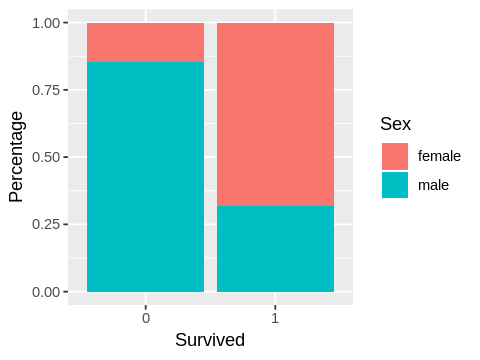

In [16]:
# First, examine the relationship between Sex and Survival using a bar chat
options(repr.plot.width=4, repr.plot.height=3)

ggplot(data = titanicTrain) +
    geom_bar(mapping = aes(x = factor(Survived), fill = Sex), position = "fill") +
    labs(x='Survived', y='Percentage')

In [17]:
# Another way for examining the relationship between Sex and Survival is by summarizing the proportions
by_sex <- group_by(titanicTrain, Sex)
summarise(by_sex, Survived = sum(Survived))  %>% mutate(Sex, Survived, Percentage = Survived / sum(Survived))

Sex,Survived,Percentage
female,233,0.6812865
male,109,0.3187135


In [18]:
# Example: Heuristic survival prediction based on Sex
# All females survived, all men died
pred2 <- mutate(titanicTest, Survived = ifelse(Sex == "female", 1, 0)) %>%
        select(PassengerId, Survived)

# Again, to measure the performance of this prediction, we save it to file and submit to 
# the Kaggle challenge for evaluation
write.csv(pred2, file = "pred2.csv", row.names=FALSE)

Use a **decision tree** based model, `rpart`,  to perform the prediction using the features: `Pclass, Sex, Age, SibSp, Parch, Fare` and `Embarked.`

In [19]:
# fit a model using rpart
fit <- rpart(Survived ~ Pclass + Sex + Age + SibSp + Parch + Fare + Embarked, data=titanicTrain, method="class")

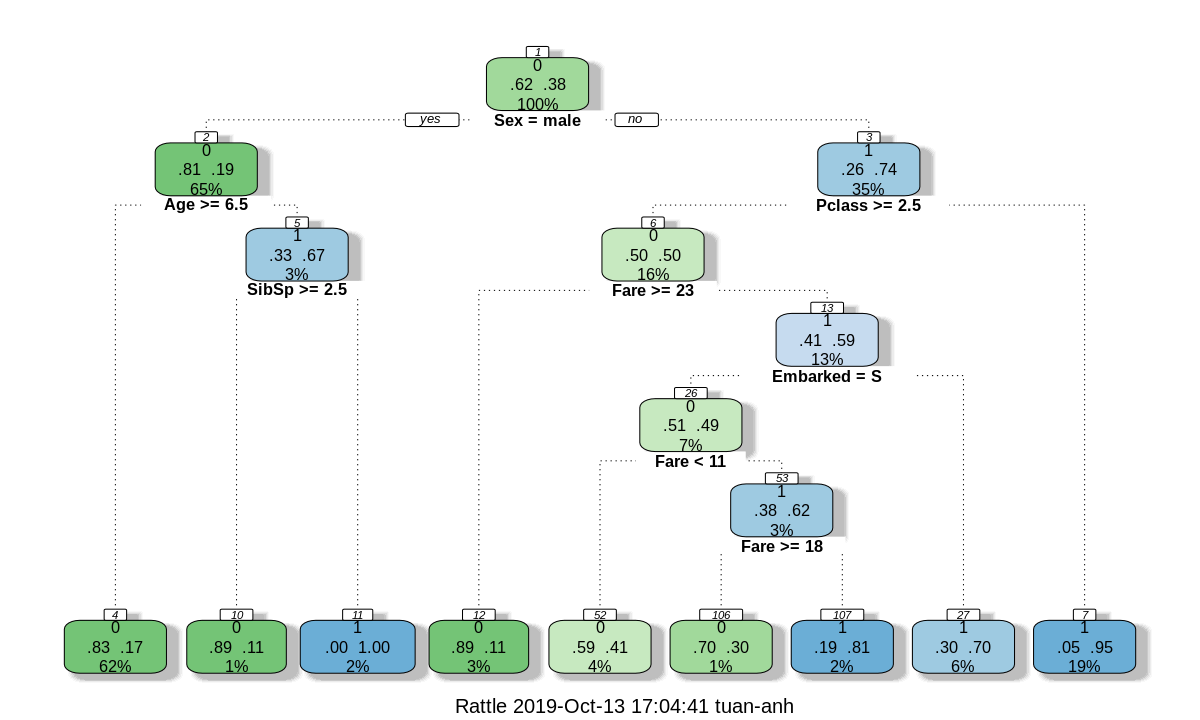

In [20]:
# visualize the learned decsion tree
options(repr.plot.width=10, repr.plot.height=6)
fancyRpartPlot(fit)

In [21]:
Prediction <- predict(fit, titanicTest, type = "class")

In [22]:
# Application of the learned model (decision tree) to the test data
Prediction <- predict(fit, titanicTest, type = "class")

pred3 <- mutate(titanicTest, Survived = Prediction) %>%
         select(PassengerId, Survived)

# Again, to measure the performance of this prediction, we save it to file and submit to 
# the Kaggle challenge for evaluation
write.csv(pred3, file = "pred3.csv", row.names=FALSE)

### Feature Engineering
Can we improve the quality of our data and hence model by combinging other information? For example, by
- computing family size
- generating title from name
- distinguishing between children and adults

In [23]:
# Create a family size variable (FamilySize) 
# by summing up siblings (SibSp), parents (Parch) and the passenger

ft <- mutate(titanicTrain, FamilySize = SibSp + Parch + 1)

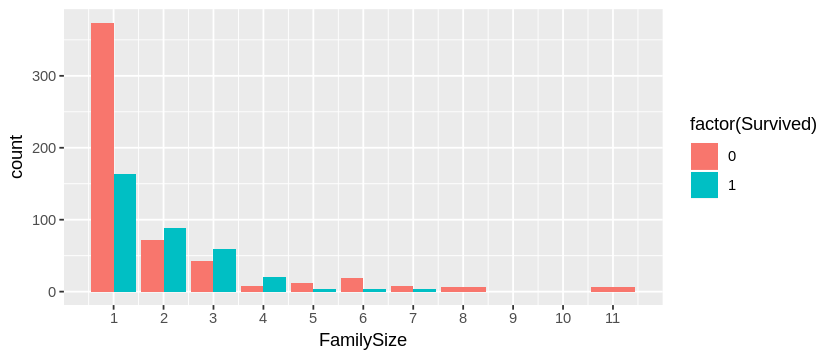

In [24]:
# Visualize relationship between FamilySize and Survival with a bar chart

options(repr.plot.width=7, repr.plot.height=3)
ggplot(ft, aes(x = FamilySize, fill = factor(Survived))) +
    geom_bar(stat='count', position='dodge') +
    scale_x_continuous(breaks=c(1:11))

In [25]:
# Create a discrete version of FamiySize variable (FamilySizeD)
# where FailySizeD = 'singleton' if FamilySize = 1
#                  = 'small' if FamilySize is between 2 and 4 inclusive
#                  = 'large' otherwise

ft <- mutate(ft, FamilySizeD =
             ifelse(FamilySize == 1, 'Singleton',
             ifelse(FamilySize > 1 & FamilySize < 5, 'small', 'large')))

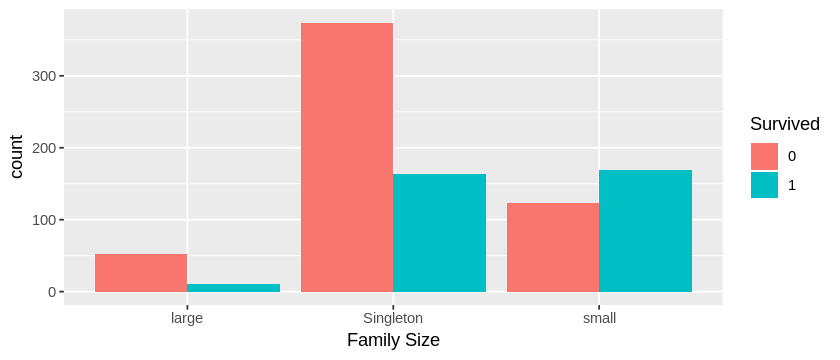

In [26]:
# Examine the relationship between new family size and survival?
ggplot(ft, aes(x = FamilySizeD, fill = factor(Survived))) +
    geom_bar(stat='count', position='dodge') +
    labs(x = 'Family Size', fill='Survived')

In [27]:
# Generate passenger title(Title) from passenger name (Name)
# Title categories: mr, mrs, miss, master, other
ft <- mutate(ft, Title = gsub('(.*, )|(\\..*)', '', Name)) %>%
      mutate(Title = ifelse(Title %in% c('Miss', 'Mlle', 'Ms'), 'Miss',
                     ifelse(Title %in% c('Mrs', 'Mme'), 'Mrs',
                     ifelse(Title == 'Master', 'Master',
                     ifelse(Title %in% c('Mr'), 'Mr', 'Other')))))
table(ft$Title)


Master   Miss     Mr    Mrs  Other 
    40    185    517    126     23 

In [28]:
# Always apply the same processing to training and testing data
# Putting it gother: handling missing values, generating title from name etc.
extractFeatures <- function(data) {

    features <- c("Pclass",
                  "Age",
                  "Sex",
                  "Parch",
                  "SibSp",
                  "Fare",
                  "Embarked",
                  "Name")

    ft <- select(data, features) %>%
          mutate(Age = ifelse(is.na(Age), -1, Age)) %>%
          mutate(Fare = ifelse(is.na(Fare), median(Fare, na.rm=TRUE), Fare)) %>%
          mutate(Embarked = as.factor(ifelse(is.na(Embarked), 'S', Embarked))) %>%
          mutate(Sex = as.factor(Sex)) %>%
          mutate(Title = gsub('(.*, )|(\\..*)', '', Name)) %>%
          mutate(Title = ifelse(Name %in% c('Miss', 'Mlle', 'Ms'), 'Miss',
                     ifelse(Title %in% c('Mrs', 'Mme'), 'Mrs',
                     ifelse(Title == 'Master', 'Master',
                     ifelse(Title %in% c('Mr'), 'Mr', 'Other'))))) %>%
          mutate(Title = as.factor(Title))
    
    ft <- select(ft, -c(Name))
    
  return(ft)
}

In [29]:
table(titanicTrain$Embarked)


  C   Q   S 
168  77 644 

In [30]:
table(titanicTest$Embarked)


  C   Q   S 
102  46 270 

In [31]:
# Building a random forest model
# This gives a score of 0.78947
rf <- randomForest(extractFeatures(titanicTrain), as.factor(titanicTrain$Survived), ntree=500, importance=TRUE)

In [32]:
# Measuring features' importance
imp <- importance(rf, type=1)
featureImportance <- tibble(Feature=row.names(imp), Importance=imp[,1])

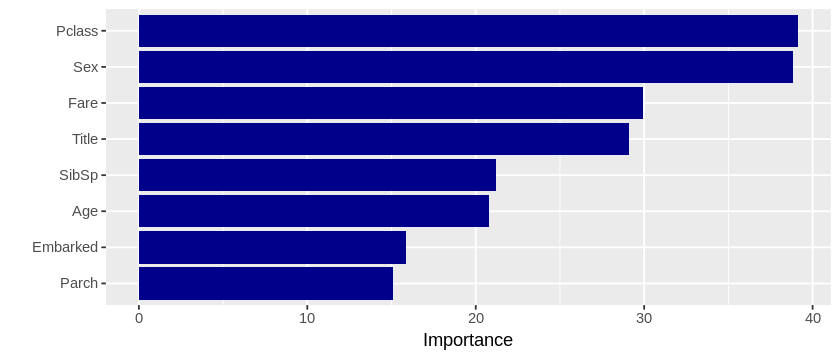

In [33]:
# visualizing feature importance
ggplot(featureImportance, aes(x=reorder(Feature, Importance), y=Importance)) +
    geom_bar(stat="identity", fill='darkblue') +
    coord_flip() +
    xlab("")

### Writing result to a file

In [34]:
# filter test set
submission <- tibble(PassengerId = titanicTest$PassengerId)
# perform prediction
submission$Survived <- predict(rf, extractFeatures(titanicTest))

# Again, to measure the performance of this prediction, we save it to file and submit to 
# the Kaggle challenge for evaluation
write.csv(submission, file = "submission.csv", row.names=FALSE)

<font color='green'> Congratulations! <font color='black'>You have seen how to:

<font color='green'>
    &#10003; install and load packages
    &#10003; load a dataset
    &#10003; explore a dataset
    &#10003; generate new features
    &#10003; build a predictive model
    &#10003; save result to file
   
<font color='black'> 
In the next lab session we will dive deep into data types, transformations and visualization in R.

## References

[Titanic: Machine Learning from Disaster](https://www.kaggle.com/c/titanic)

[Exploring Survival on the Titanic](https://www.kaggle.com/mrisdal/exploring-survival-on-the-titanic)


[Random Forest Benchmark (R)](https://www.kaggle.com/benhamner/random-forest-benchmark-r)